In [1]:
import numpy as np # thư viện để tính toán
import matplotlib.pyplot as plt # thư viện dùng để vẽ
import pandas as pd

In [2]:
df = pd.read_csv('weight-height.csv')
print(df)

      Gender     Height      Weight
0       Male  73.847017  241.893563
1       Male  68.781904  162.310473
2       Male  74.110105  212.740856
3       Male  71.730978  220.042470
4       Male  69.881796  206.349801
...      ...        ...         ...
9995  Female  66.172652  136.777454
9996  Female  67.067155  170.867906
9997  Female  63.867992  128.475319
9998  Female  69.034243  163.852461
9999  Female  61.944246  113.649103

[10000 rows x 3 columns]


In [3]:
df['Height'] = df['Height']*2.54
df['Weight'] = df['Weight']*0.453592
print('In ra Head')
print(df.head())


In ra Head
  Gender      Height      Weight
0   Male  187.571423  109.720985
1   Male  174.706036   73.622732
2   Male  188.239668   96.497550
3   Male  182.196685   99.809504
4   Male  177.499761   93.598619


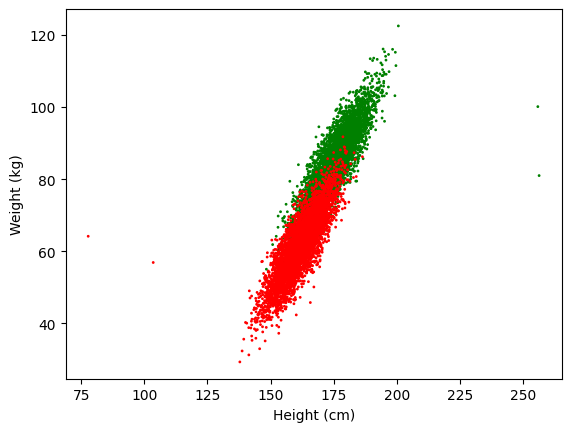

In [4]:
colors = ['green' if color == 'Male' else 'red' for color in df['Gender']]
plt.scatter(df['Height'], df['Weight'],s=1, color=colors)
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

[109.72098511  73.62273185  96.49755015 ...  58.2753768   74.32216565
  51.55032378]
y_pre: [[98.76190198]
 [81.46960308]
 [99.66008585]
 ...
 [64.69350497]
 [82.33108887]
 [58.12583376]]
w1: 1.3440947379390247
w0: -153.3518609678979


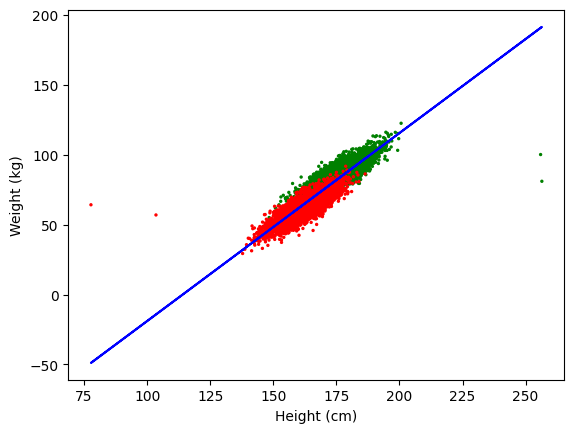

In [17]:
x = df['Height'].values.reshape(-1, 1)
y = df['Weight'].values

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x, y)

w1 = reg.coef_[0]  # w1
w0 = reg.intercept_  # w0

# y_pre = reg.predict(x) 
y_pre = reg.coef_[0] * x + reg.intercept_

print("y_pre:", y_pre)
print("w1:", w1)
print("w0:", w0)
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.scatter(x, y, s=2, c=colors)  # Vẽ các điểm dữ liệu
plt.plot(x, y_pre, c='blue')  # Vẽ đường thẳng
plt.show()


In [6]:
x = df['Height']
y = df['Weight']
n = np.size(x)  

w1 = (n * np.sum(x * y) - np.sum(x) * np.sum(y)) / (n * np.sum(x**2) - np.sum(x)**2)
w0 = (1 / n) * np.sum(y) - w1 * (1 / n) * np.sum(x)

print("w1:", w1)
print("w0:", w0)


w1: 1.3440947379391772
w0: -153.35186096792359


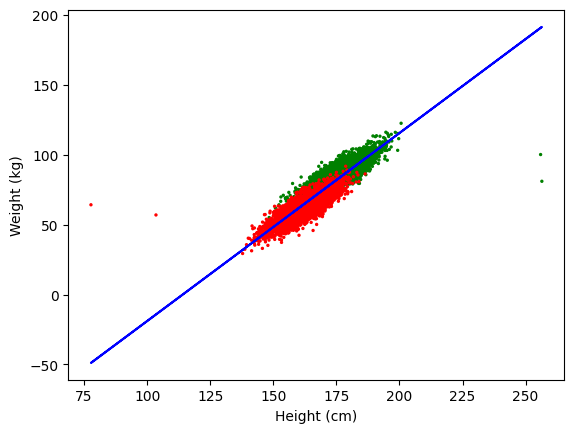

In [7]:
y1 = w1 * x + w0
plt.scatter(x, y, s=2, c = colors)
plt.plot(x, y1, color = 'blue')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

In [14]:

# y1 = y1.flatten()
print(y1)
y2 = np.abs(y - y1)
print(y2.head())
# dt_err_sort = dt_err.sort_values(by='y2', ascending=False)
# dt_err_10 = dt_err_sort.head(int(len(y) * 0.1))

# # In ra 10% điểm có sai số cao nhất
# print("10% điểm có sai số cao nhất:")
# print(dt_err_10)



0       98.761902
1       81.469603
2       99.660086
3       91.537745
4       85.224634
          ...    
9995    72.561615
9996    75.615448
9997    64.693505
9998    82.331089
9999    58.125834
Name: Height, Length: 10000, dtype: float64
0    10.959083
1     7.846871
2     3.162536
3     8.271759
4     8.373984
dtype: float64


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


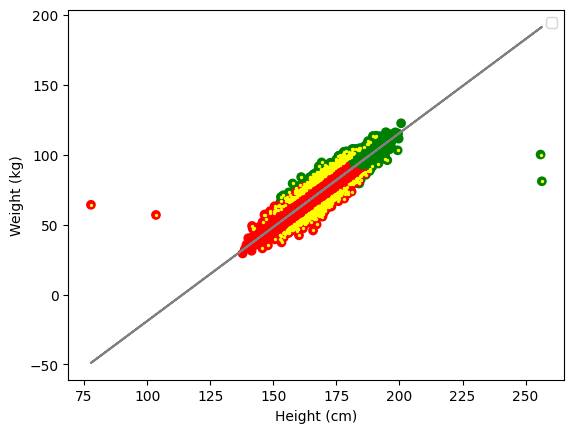

In [ ]:
# In các điểm dữ liệu có sai số cao nhất với màu vàng
plt.scatter(x, y, c=colors)
plt.scatter(x[dt_err_10.index], y[dt_err_10.index], s=2, color='yellow') 
plt.plot(x, y_pre, color='gray')  
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.legend()
plt.show()


